In [3]:
import pandas as pd

# Load data from revenue, and public performance

In [4]:
school_df = pd.read_csv('school_clean.csv')
revenue_data = pd.read_csv('Revenues_and_Expenditures_2018_DEC_10th_2018.csv')
district = pd.read_csv('district-18.csv')

## Cleaning the revenue data and prepping it for merge


In [5]:
revenue_all = revenue_data.loc[revenue_data[revenue_data.columns[1]] == 'ALL']
revenue_district = revenue_data.loc[revenue_data[revenue_data.columns[1]] != 'ALL']
revenue_all.loc[:,'Percent Total'] = revenue_all['REV_EXP_VALUE']/revenue_all['REV_EXP_VALUE'].sum()
# revenue_all.sort_values('Percent Total', axis = 1, ascending = False)
top_expense = revenue_all.sort_values('Percent Total', ascending = False)[['Description',	'REV_EXP_VALUE',	'Dollars per FTE',	'Percent Total']].head(5)
top_expense

C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\hsueh\Conda\envs\PythonEnv3.9\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Description,REV_EXP_VALUE,Dollars per FTE,Percent Total
2,Instruction,1.054111e+10,6019.23,0.327217
16,State QBE,9.076444e+09,5182.87,0.281751
12,Local,6.974889e+09,3982.83,0.216514
4,Maintenance and Operations,1.354104e+09,773.23,0.042034
8,School Administration,1.118083e+09,638.45,0.034707


In [6]:
school_df

,School Year,School District Code,School District Name,School Code,School Name,Graduates,Postsecondary Institution,Percent
0,2017,601,Appling County,ALL,All Schools,198.0,118.0,59.60
1,2017,602,Atkinson County,ALL,All Schools,97.0,60.0,61.86
2,2017,603,Bacon County,ALL,All Schools,118.0,66.0,55.93
3,2017,605,Baldwin County,ALL,All Schools,271.0,171.0,63.10
4,2017,606,Banks County,ALL,All Schools,209.0,108.0,51.67
...,...,...,...,...,...,...,...,...
180,2017,789,Thomasville City,ALL,All Schools,155.0,123.0,79.35
181,2017,791,Trion City,ALL,All Schools,88.0,69.0,78.41
182,2017,792,Valdosta City,ALL,All Schools,374.0,247.0,66.04
183,2017,793,Vidalia City,ALL,All Schools,167.0,114.0,68.26


In [7]:
# pd.merge(school_df,revenue_district,on = 'DISTRICT_CODE')
school_df
revenue_district = revenue_district.rename(columns={'DISTRICT_CODE' : school_df.columns[1]})

school_df['School District Code']
revenue_district ['School District Code'] = revenue_district['School District Code'].astype(int)

In [19]:
revenue_percent = pd.merge(school_df, revenue_district, how='inner', on='School District Code')

revenue_percent.loc[:,'Percent'] = revenue_percent['Percent'].round()
rounded_school_df = revenue_percent.groupby('Percent').mean()[['REV_EXP_VALUE', 'Dollars per FTE']]

<AxesSubplot:xlabel='Percent'>

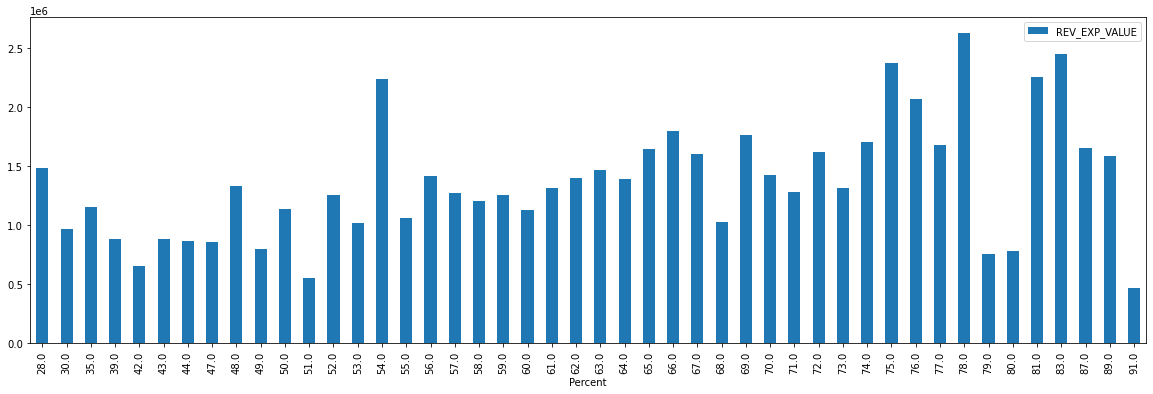

In [22]:
rounded_school_df.plot.bar(y = 'REV_EXP_VALUE',figsize = (20,6))
# revenue_percent.plot.bar(y = 'REV_EXP_VALUE', x = 'Percent')

In [ ]:
revenue_percent.columns

Index(['School Year', 'School District Code', 'School District Name',
       'School Code', 'School Name', 'Graduates', 'Postsecondary Institution',
       'Percent', 'SCHOOL_YEAR', 'DISTRICT_NAME', 'SCHOOL_CODE', 'SCHOOL_NAME',
       'Revenues/Expenditures', 'Description', 'REV_EXP_VALUE',
       'Dollars per FTE'],
      dtype='object')